In [1]:
import pandas as pd
import numpy as np

1. 데이터 셋 불러오기
   seaborn 라이브러리에 있는 titanic 데이터를 불러옵니다.

In [2]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

2. feature 분석
   데이터를 잘 불러오셨다면 해당 데이터의 feature를 파악해야합니다. 데이터의 feature를 파악하기 위해 아래의 다양한 feature 분석을 수행해주세요. 

In [3]:
# 2-1. head 함수를 이용해 데이터 프레임의 첫 5행을 출력하여 어떤 feature들이 있는지 확인해주세요. 
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# 2-2. describe 함수를 통해서 기본적인 통계를 확인해주세요. 
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**2-3. describe 함수를 통해 확인할 수 있는 count, std, min, 25%, 50%, 75%, max 가 각각 무슨 뜻인지 주석 혹은 markdown 블록으로 간단히 설명해주세요.**
count: 각 열의 유효한 데이터 갯수. 이 값이 작은 열은 결측치가 많다는 것을 알 수 있다. 여기서는 age 열이 결측치가 많다. 
std: 표준편차. 데이터의 흩어짐을 나타내는거고, 이 값이 클수록 데이터가 넓게 퍼져있다
min: 열의 최솟값
25%: 1사분위수, 데이터의 하위 25%에 해당하는 값이다. 
50%: median(중앙값). 데이터의 중간값이다. 
75% 3사분위수로, 데이터의 상위 25%에 해당하는 값이다. 
max: 열의 최댓값

[추가 설명]
survived에서 0은 사망 1은 생존이다. 이건 titanic 데이터셋의 설명이나 공식 문서에 명시되어있는 정보인데,
이를 토대로 해석해보자면 승객 중 절반(50%)이상은 사망하였고, 전체 승객의 3사분위수(상위 25%)의 일부는 생존했음을 알 수 있다.

pclass는 승객의 좌석 등급을 나타내는 변수이다. 이 변수는 1,2,3 세 가지 값으로 구성되어 있으며, 각각 다음을 의미한다.
1: 1등석  2: 2등석  3: 3등석
sibsp: sibling and spuse (형제자매 및 배우자의 수를 나타냄)
parch: parent and child (부모 및 자녀의 수)
fare: 운임 요금


In [5]:
# pclass별 생존율 계산 (이건 공부하다가 궁금해서 해봤습니다.)
# 상대적으로 1등석 승객의 생존율이 높았음
pclass_survival = titanic.groupby('pclass')['survived'].mean()
print(pclass_survival)


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [6]:
# 2-4. isnull() 함수와 sum() 함수를 이용해 각 열의 결측치 갯수를 확인해주세요.
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


**3. feature engineering**
   feature engineering은 모델의 성능을 향상시키기 위해 중요한 단계입니다. 2번 feature 분석에서 얻은 데이터에 대한 이해를 바탕으로 아래의 feature engineering을 수행해주세요. 

**3-1. 결측치 처리**
Age(나이)의 결측치는 중앙값으로, Embarked(승선 항구)의 결측치는 최빈값으로 대체해주세요. 
모두 대체한 후에, 대체 결과를 isnull() 함수와 sum()  함수를 이용해서 확인해주세요. 

In [7]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

print(titanic['age'].isnull().sum())
print(titanic['embarked'].isnull().sum())

0
0


**3-2. 수치형으로 인코딩**
Sex(성별)를 남자는 0, 여자는 1로 변환해주세요. alive(생존여부)를 yes는 1, no는 0으로 변환해주세요. 
Embarked(승선 항구)는 ‘C’는 0으로, Q는 1으로, ‘S’는 2로 변환해주세요. 모두 변환한 후에, 변환 결과를 head 함수를 이용해 확인해주세요. 

In [8]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['alive'] = titanic['alive'].map({'yes': 1, 'no': 0})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2,})

print(titanic['sex'].head())
print(titanic['alive'].head())
print(titanic['embarked'].head())

0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: int64
0    0
1    1
2    1
3    1
4    0
Name: alive, dtype: int64
0    2
1    0
2    2
3    2
4    2
Name: embarked, dtype: int64


**3-3. 새로운 feature 생성**

SibSip(타이타닉호에 동승한 자매 및 배우자의 수), Parch(타이타닉호에 동승한 부모 및 자식의 수)를 통해서 family_size(가족크기)를 생성해주세요. 새로운 feature를 head 함수를 이용해 확인해주세요. 

In [9]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1 # +1은 '나'

print(titanic['family_size'].head())

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


**4. 모델 학습시키기**

4-1. 모델 학습 준비
이제 모델을 학습시키기 위한 데이터를 준비하겠습니다. 학습에 필요한 feature은 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', ‘family_size’ 입니다.
feature과 target을 분리해주세요.  그 다음 데이터 스케일링을 진행해주세요. 

In [10]:
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size']]
X = titanic.drop('survived', axis=1) # feature #.drop()으로 survived 열을 뺌
y = titanic['survived'] # target

이제 Logistic Regression, Random Forest, XGBoost를 통해서 생존자를 예측하는 모델을 학습하세요. 
학습이 끝난 뒤 Logistic Regression과 Random Forest는 모델 accuracy를 통해, 
XGBoost는 mean squared error를 통해 test data를 예측하세요. 

**4-2. Logistic Regression**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [12]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



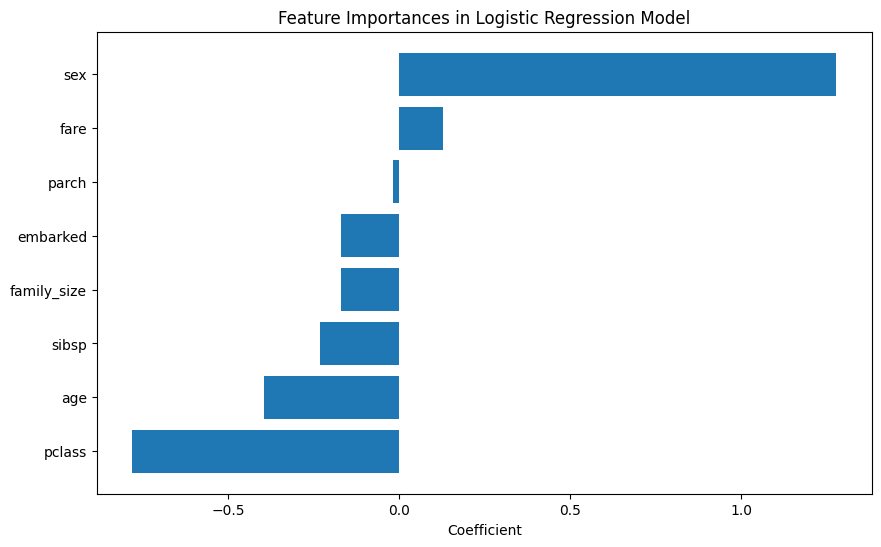

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 회귀 계수(coefficient) 추출
coefficients = model.coef_[0]

# 변수명과 회귀 계수를 데이터프레임으로 정리
feature_importances = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importances = feature_importances.sort_values(by='Coefficient', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importances in Logistic Regression Model')
plt.gca().invert_yaxis()  # 중요도 높은 순으로 보기 위해 축 반전
plt.show()

**4-3. Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Random Forest 모델 생성 및 학습
model = RandomForestClassifier(random_state=42)  # 랜덤 포레스트 생성
model.fit(X_train, y_train)

# 예측 (Random Forest에서)
y_pred_rf = model.predict(X_test)  # Random Forest 모델로 예측

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Accuracy: 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



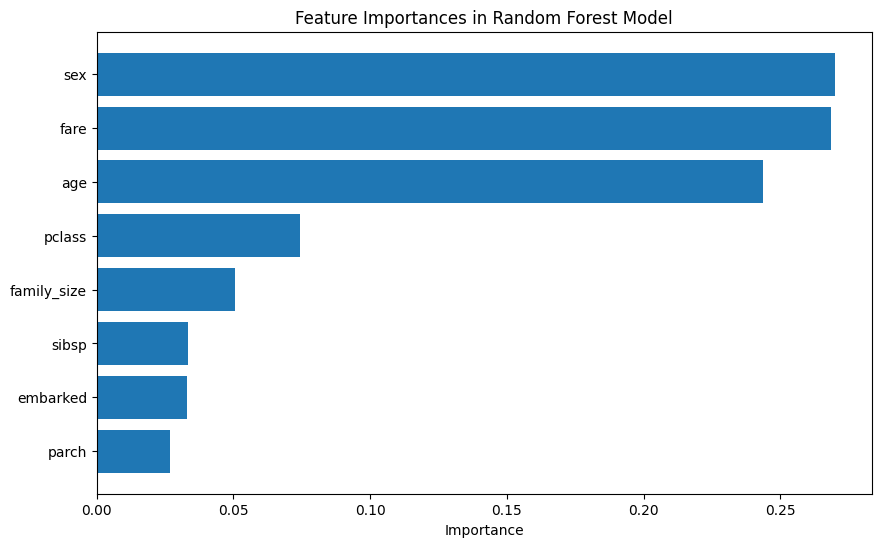

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 변수의 중요도 추출
importances = model.feature_importances_

# 변수명과 중요도를 데이터프레임으로 정리
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # 중요도 높은 순으로 보기 위해 축 반전
plt.show()

**4-4. Decision Tree**

In [16]:
# 데이터 분할 # 20%를 테스트데이터로 사용함.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.770949720670391
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       105
           1       0.70      0.78      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179



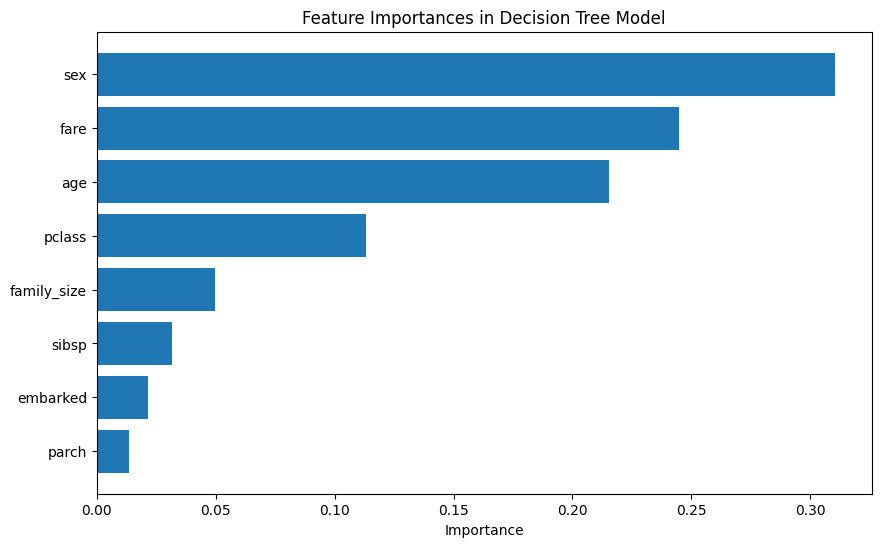

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 변수의 중요도 추출
importances = model.feature_importances_

# 변수명과 중요도를 데이터프레임으로 정리
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree Model')
plt.gca().invert_yaxis()  # 중요도 높은 순으로 보기 위해 축 반전
plt.show()

**4-5.XGBoost**

In [19]:
#pip install xaboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 모델 학습
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost 모델의 MSE: {mse_xgb}')

XGBoost 모델의 MSE: 0.12981004899201257


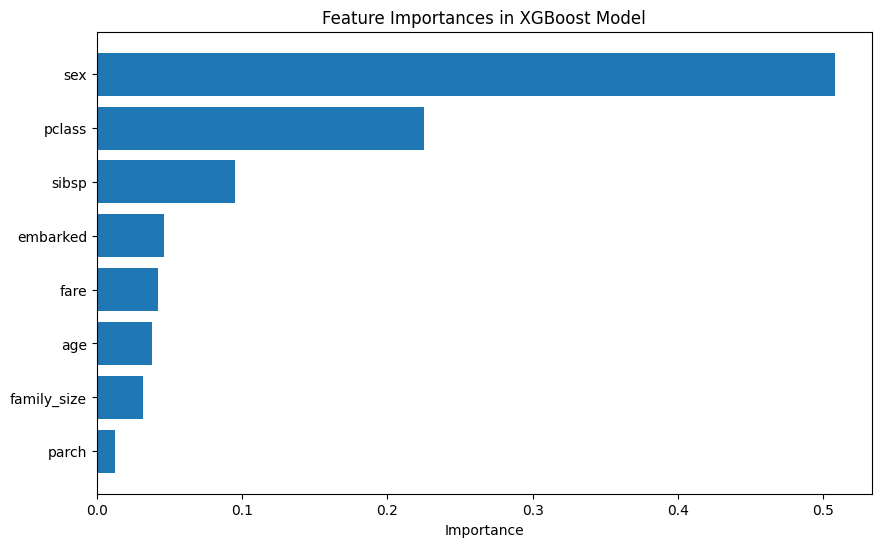

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 변수의 중요도 추출
importances = xgb_model.feature_importances_

# 변수명과 중요도를 데이터프레임으로 정리
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in XGBoost Model')
plt.gca().invert_yaxis()  # 중요도 높은 순으로 보기 위해 축 반전
plt.show()

**4-6. SVM (Support Vector Machine)**
SVM은 거리 기반 알고리즘이므로, 스케일링이 필요하다.

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (SVM은 스케일링이 중요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM 모델 생성 및 학습
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 예측
y_pred_svm = svm_model.predict(X_test_scaled)

# 평가
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"SVM Classification Report:\n{classification_report(y_test, y_pred_svm)}")

SVM Accuracy: 0.8156424581005587
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



**4-7. KNN (K-Nearest Neighnor)**
KNN도 거리 기반 알고리즘이므로, 스케일링이 필요하다

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (KNN도 거리 기반이므로 스케일링이 중요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 모델 생성 및 학습
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# 예측
y_pred_knn = knn_model.predict(X_test_scaled)

# 평가
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"KNN Classification Report:\n{classification_report(y_test, y_pred_knn)}")

KNN Accuracy: 0.8212290502793296
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



**4-8. Naive Bayes**
Naive Bayes는 확률 계산에 기반한 모델로, 기본적으로 스케일링 없이도 작동할 수 있다.

In [36]:
from sklearn.naive_bayes import GaussianNB

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes 모델 생성 및 학습 (스케일링 불필요)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 예측
y_pred_nb = nb_model.predict(X_test)

# 평가
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"Naive Bayes Classification Report:\n{classification_report(y_test, y_pred_nb)}")

Naive Bayes Accuracy: 0.7821229050279329
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



예측력 약 80% 쯤
이 예측력이 좋은지 나쁜지(모델의 성능 평가)는 여러 요소를 고려해야 한다.
1. 문제의 복잡도와 데이터 특성
 - 데이터의 복잡도와 문제의 특성에 따라 80%는 좋을수도 나쁠수도 있음

In [38]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 분할 (기존 코드 활용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 무작위 분류(Random Classifier)
random_clf = DummyClassifier(strategy="uniform", random_state=42)
random_clf.fit(X_train, y_train)
y_pred_random = random_clf.predict(X_test)

# 최빈값 예측 모델 (Most Frequent Classifier)
most_frequent_clf = DummyClassifier(strategy="most_frequent")
most_frequent_clf.fit(X_train, y_train)
y_pred_most_frequent = most_frequent_clf.predict(X_test)

# 성능 평가 (무작위 분류)
print("Random Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_random)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_random, zero_division=0)}")

# 성능 평가 (최빈값 예측 모델)
print("Most Frequent Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_most_frequent)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_most_frequent, zero_division=0)}")

Random Classifier:
Accuracy: 0.45251396648044695
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.44      0.48       105
           1       0.37      0.47      0.42        74

    accuracy                           0.45       179
   macro avg       0.46      0.46      0.45       179
weighted avg       0.47      0.45      0.46       179

Most Frequent Classifier:
Accuracy: 0.5865921787709497
Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



In [ ]:
ㅇㅇㅇㅇ